In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import joblib
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import re
import toml

from tqdm.auto import tqdm

## User functions

In [3]:
fig_dir = "/storage/home/hcoda1/4/jmarkowitz30/shared_folder/active_lab_members/markowitz_jeffrey/panels/2025-05 (ScarCaMP paper)/"
os.makedirs(fig_dir, exist_ok=True)

In [4]:
proc_file_ca = "/storage/home/hcoda1/4/jmarkowitz30/shared_folder/active_lab_members/markowitz_jeffrey/active_projects/red_calcium_screen/for_paper/purified_protein_spectra/240821 JM39 ScarCaMP-L01-69 Ca_full.xlsx"
proc_file_egta = "/storage/home/hcoda1/4/jmarkowitz30/shared_folder/active_lab_members/markowitz_jeffrey/active_projects/red_calcium_screen/for_paper/purified_protein_spectra/240821 JM39 ScarCaMP-L01-69 EGTA_full.xlsx"

In [7]:
ex_spectrum_ca = pd.read_excel(proc_file_ca, sheet_name="Plate 1 - Sheet1", skiprows=36, nrows=122).set_index("Wavelength").dropna(axis=1).mean(axis=1)
em_spectrum_ca = pd.read_excel(proc_file_ca, sheet_name="Plate 1 - Sheet1", skiprows=161, nrows=61).set_index("Wavelength").dropna(axis=1).mean(axis=1)
ex_spectrum_egta = pd.read_excel(proc_file_egta, sheet_name="Plate 1 - Sheet1", skiprows=36, nrows=122).set_index("Wavelength").dropna(axis=1).mean(axis=1)
em_spectrum_egta = pd.read_excel(proc_file_egta, sheet_name="Plate 1 - Sheet1", skiprows=161, nrows=61).set_index("Wavelength").dropna(axis=1).mean(axis=1)

In [8]:
ex_spectrum_ca_normave = (ex_spectrum_ca / ex_spectrum_egta.max()).rename("ex_ca")
em_spectrum_ca_normave = (em_spectrum_ca / em_spectrum_egta.max()).rename("em_ca")

In [9]:
ex_spectrum_egta_normave = (ex_spectrum_egta / ex_spectrum_egta.max()).rename("ex_egta")
em_spectrum_egta_normave = (em_spectrum_egta / em_spectrum_egta.max()).rename("em_egta")

In [10]:
norm_df = pd.concat([ex_spectrum_ca_normave, em_spectrum_ca_normave, ex_spectrum_egta_normave, em_spectrum_egta_normave],axis=1)

In [11]:
kwargs = {"lw": 1}
smoothing_kwargs = {"window": 3, "min_periods": 1, "center": True}

In [12]:
from calcium_imaging_analysis.fig import setup_plotting_env

In [13]:
setup_plotting_env()
# sns.set_context("paper")
# plt.style.use("default")

In [14]:
smooth_df = norm_df.rolling(**smoothing_kwargs).mean()

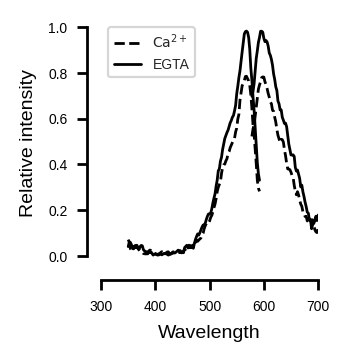

In [15]:
fig, ax = plt.subplots(1, figsize=(1.4,1.6))
smooth_df["ex_ca"].plot(ax=ax, ls="--", color="k", **kwargs, label=r"$\mathrm{Ca}^{2+}$")
smooth_df["ex_egta"].plot(ax=ax, ls="-", color="k", **kwargs, label="EGTA")
smooth_df["em_ca"].plot(ax=ax, ls="--", color="k", **kwargs)
smooth_df["em_egta"].plot(ax=ax, ls="-", color="k", **kwargs)
ax.set_xlim(300, 700)
ax.set_xticks(range(300,701,100))
ax.set_ylabel("Relative intensity")
ax.legend(handles=ax.get_lines()[:2])
sns.despine(offset=5, trim=True)
fig.savefig(os.path.join(fig_dir, "purified_protein_spectra.pdf"), dpi=600, bbox_inches="tight")